# File Youtube - Tilburg School Hub


#### Information of Data 
This dataset contains YouTube video and channel metadata, including total views, likes/dislikes, comments/views, and other ratios, to analyze the statistical relation between videos and form a topic tree 
- total views/channel elapsed time: Ratio of total views to channel elapsed time (hours). (Ratio)
- channelViewCount: Total number of views for the channel. (Integer)
- likes/subscriber: Ratio of likes to subscribers. (Ratio)
- views/subscribers: Ratio of views to subscribers. (Ratio)
- subscriber Count: Total number of subscribers for the channel. (Integer)
- dislikes/views: Ratio of dislikes to views. (Ratio)
- comments/subscriber: Ratio of comments to subscribers. (Ratio)
- channel Comment Count: Total number of comments for the channel. (Integer)
- likes/dislikes: Ratio of likes to dislikes. (Ratio)
- comments/views: Ratio of comments to views. (Ratio)
- dislikes/subscriber: Ratio of dislikes to subscribers. (Ratio)
- totviews/totsubs: Ratio of total views to total subscribers. (Ratio)
- views/elapsedtime: Ratio of views to elapsed time. (Ratio)



In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('./YouTubeDataset_withChannelElapsed.csv', index_col=0) 
print(df.head(3))

       totalviews/channelelapsedtime                 channelId  \
index                                                            
0                           0.165199  UCdzU3DSGzyWzN2118yd9X9g   
1                           1.133820  UC0UnhAG47DRyVZGVcbhAXhQ   
2                           0.668120  UCXjtAvK5P3wXBGh0vbGylzg   

       videoCategoryId  channelViewCount  likes/subscriber  views/subscribers  \
index                                                                           
0                   22             14654          0.555556          95.111111   
1                   10            105909          0.239130          59.326087   
2                   27             48265          0.023669          10.289941   

       videoCount  subscriberCount      videoId  dislikes/views  ...  \
index                                                            ...   
0              30               18  --DwgB78t-c        0.000584  ...   
1              51              184  --NZRkXBV7k

First we will look at the data to have some more information about it and understand and have more descriptions about the data at hand. 

In [35]:
##How many data inputs or rows 
print(df.count())

#describe
print(df.describe())

totalviews/channelelapsedtime    575610
channelId                        575610
videoCategoryId                  575610
channelViewCount                 575610
likes/subscriber                 575610
views/subscribers                575610
videoCount                       575610
subscriberCount                  575610
videoId                          575610
dislikes/views                   575610
channelelapsedtime               575610
comments/subscriber              575610
likes/views                      575610
channelCommentCount              575610
videoViewCount                   575610
likes/dislikes                   575610
comments/views                   575610
totvideos/videocount             575610
elapsedtime                      575610
videoLikeCount                   575610
videoDislikeCount                575610
dislikes/subscriber              575610
totviews/totsubs                 575610
views/elapsedtime                575610
videoPublished                   575610


some min values are negative -> mainly related to ratios
However, VideoCommentCount is weirly min -1, same for videolike count 
All those probably to mark missing values.


In [36]:
df.isnull().sum() ##checking previous affirmation 

totalviews/channelelapsedtime    0
channelId                        0
videoCategoryId                  0
channelViewCount                 0
likes/subscriber                 0
views/subscribers                0
videoCount                       0
subscriberCount                  0
videoId                          0
dislikes/views                   0
channelelapsedtime               0
comments/subscriber              0
likes/views                      0
channelCommentCount              0
videoViewCount                   0
likes/dislikes                   0
comments/views                   0
totvideos/videocount             0
elapsedtime                      0
videoLikeCount                   0
videoDislikeCount                0
dislikes/subscriber              0
totviews/totsubs                 0
views/elapsedtime                0
videoPublished                   0
VideoCommentCount                0
dtype: int64

In [37]:
df.replace(-1, np.nan, inplace=True)
df.isnull().sum()

totalviews/channelelapsedtime        0
channelId                            0
videoCategoryId                      0
channelViewCount                     0
likes/subscriber                 28341
views/subscribers                17915
videoCount                           0
subscriberCount                      0
videoId                              0
dislikes/views                   11463
channelelapsedtime                   0
comments/subscriber              29121
likes/views                      11463
channelCommentCount                  0
videoViewCount                     104
likes/dislikes                       4
comments/views                   12120
totvideos/videocount               268
elapsedtime                          0
videoLikeCount                   11370
videoDislikeCount                11370
dislikes/subscriber              28341
totviews/totsubs                 17827
views/elapsedtime                    0
videoPublished                       0
VideoCommentCount        

# Question 
 Some background from the book The Youtube Formula-Derral Evas (PART I- Ch 3 to 4) is taken into account as well as consulting actual requirements for the Youtube Parnertship. Youtube Partnership allows creators to have earning and to belong to this means at least 1k subscribers and (4000 hours or 10M short videos). I have an interest in the difference of power of prediction between [0,1000], per channel when taking a factor of consistency of videos. 
 
 In our interest is to discover whether we could make a better prediction of the subscriptions goal by adding (total videos x channel elapsed time). This interaction (videos count x channel elapsed time) is seen as a proxy for consistency. We could argue that consitency could play a important factor for the prediction of subscribers.  This aims to respond the question, whether consistency of videos is important to predict reaching 1k subs. Is consistency relevant to predict subscription level? This will be evaluated with R2 and a min MSA. 
 
 Our hyphothesis will be: 
 H0: This measure or iteraction is not significantly relevant in prediction.  
 

## Data Cleaning 

In the following section we will proceed to clean the data and look.


In [38]:
##dropping all no need
df=df.drop(["totalviews/channelelapsedtime","videoCategoryId","dislikes/views","videoViewCount","likes/dislikes","likes/views","comments/subscriber","likes/subscriber","elapsedtime","videoDislikeCount","dislikes/subscriber","views/subscribers","videoPublished","views/elapsedtime","videoId","VideoCommentCount", "comments/views","videoLikeCount"], axis=1)

#total videos of the channel 
df["NumVideos"]=df["videoCount"] ##before there was a confusion that is why now it takes correctly video count in the name totvideos
df=df.drop(["totvideos/videocount","videoCount"], axis=1)

#total views of the channel
df["total_views"]=df["subscriberCount"]*df["totviews/totsubs"]

#drop all channels that have higher of 1000 subscriptors 
df=df.drop(df.index[df["subscriberCount"]>1000])  

#Consistency 
df["consistency"]=df["channelelapsedtime"]*df["NumVideos"]  #time since channel published x the total of videos in the channel 



In [39]:
print(df.count())

channelId              342047
channelViewCount       342047
subscriberCount        342047
channelelapsedtime     342047
channelCommentCount    342047
totviews/totsubs       324220
NumVideos              342047
total_views            324220
consistency            342047
dtype: int64


##### Dropping duplicates 

In [41]:
##here I was dropping dupplicates for the ones in channelId 
df=df.drop_duplicates(keep='last',subset=['channelId']).reset_index(drop=True)
print(df.count())

channelId              315063
channelViewCount       315063
subscriberCount        315063
channelelapsedtime     315063
channelCommentCount    315063
totviews/totsubs       299537
NumVideos              315063
total_views            299537
consistency            315063
dtype: int64


In [42]:
## selecting variables for consistency 
X=df[["consistency","channelViewCount","channelCommentCount","subscriberCount","channelelapsedtime","NumVideos"]].copy()

X.head(3)

,consistency,channelViewCount,channelCommentCount,subscriberCount,channelelapsedtime,NumVideos
0,2661150,14654,1,18,88705,30
1,4763859,105909,8,184,93409,51
2,5201280,48265,5,338,72240,72


In [43]:
print(X.describe(include="all"))


        consistency  channelViewCount  channelCommentCount  subscriberCount  \
count  3.150630e+05      3.150630e+05        315063.000000    315063.000000   
mean   5.649058e+06      3.721816e+05            22.057658       167.318533   
std    2.577522e+07      7.875054e+06           382.648309       232.437566   
min    0.000000e+00      0.000000e+00             0.000000         0.000000   
25%    4.863600e+05      1.669850e+04             0.000000        11.000000   
50%    1.522152e+06      7.090900e+04             1.000000        56.000000   
75%    4.456668e+06      2.653035e+05             5.000000       229.000000   
max    3.375259e+09      3.029380e+09         84827.000000      1000.000000   

       channelelapsedtime      NumVideos  
count       315063.000000  315063.000000  
mean         69297.320028      80.859644  
std          20275.039275     414.407173  
min            888.000000       0.000000  
25%          53160.000000       8.000000  
50%          70608.000000     

# EDA


First we will take a look to the distributions 


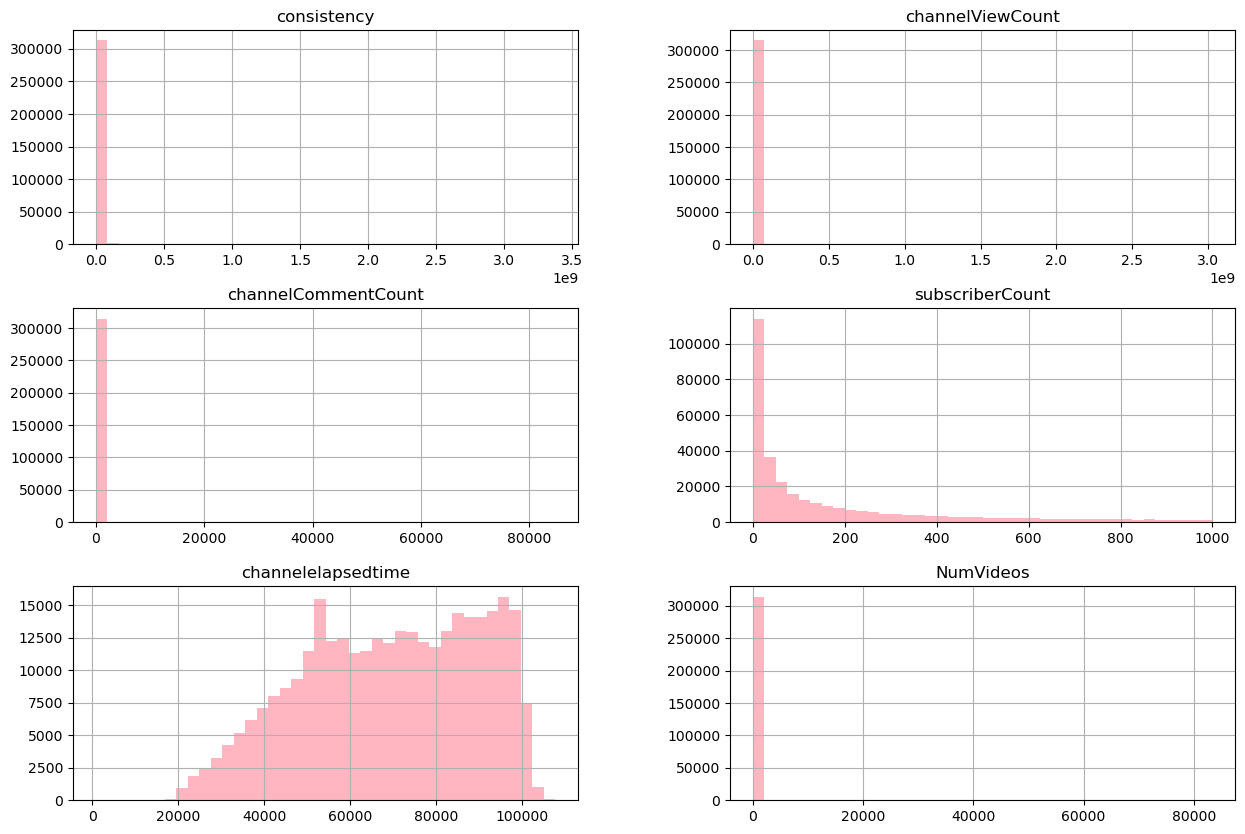

In [44]:
X.hist(color = "lightpink",bins = 40, figsize = (15,10))
plt.show()

- the distributions have a very high righ skewness. 

##### Standarization log

Here log is taken because we have skewed data so we can transform for normalization. 

In [48]:

X_standarized= ["consistency","channelViewCount","channelCommentCount","subscriberCount","channelelapsedtime","NumVideos"]
X[X_standarized] = X[X_standarized].apply(lambda x: np.log(x+1))

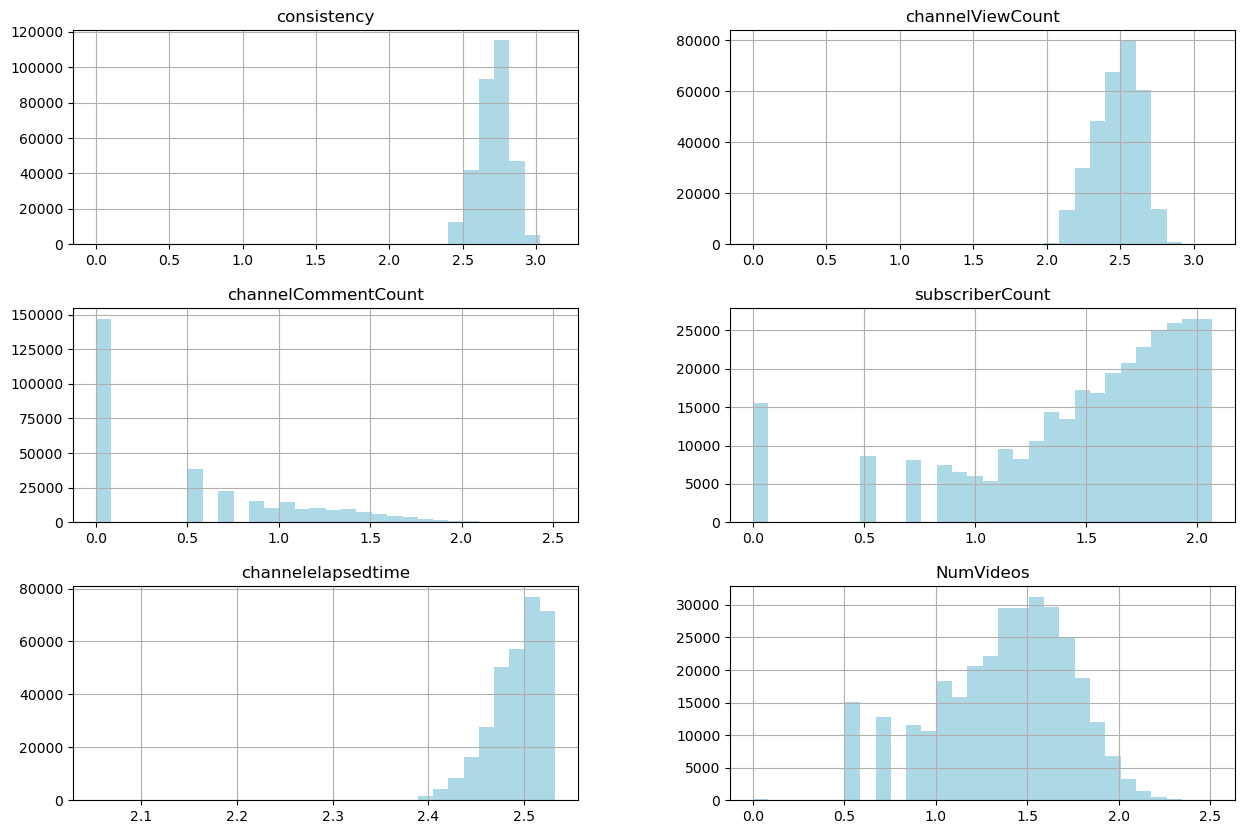

In [51]:
X.hist(color = "lightblue",bins = 30, figsize = (15, 10))
plt.show()


Let's check outliers with a boxplot. 

<AxesSubplot:>

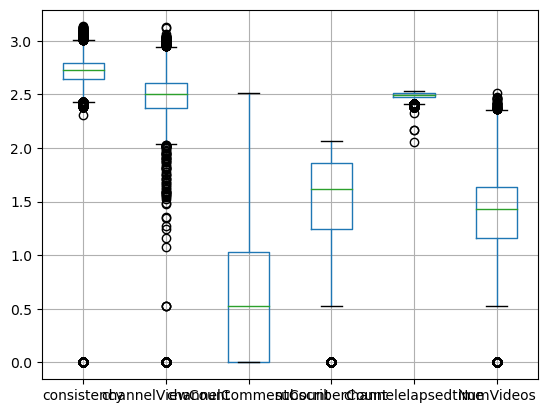

In [52]:
X.boxplot()

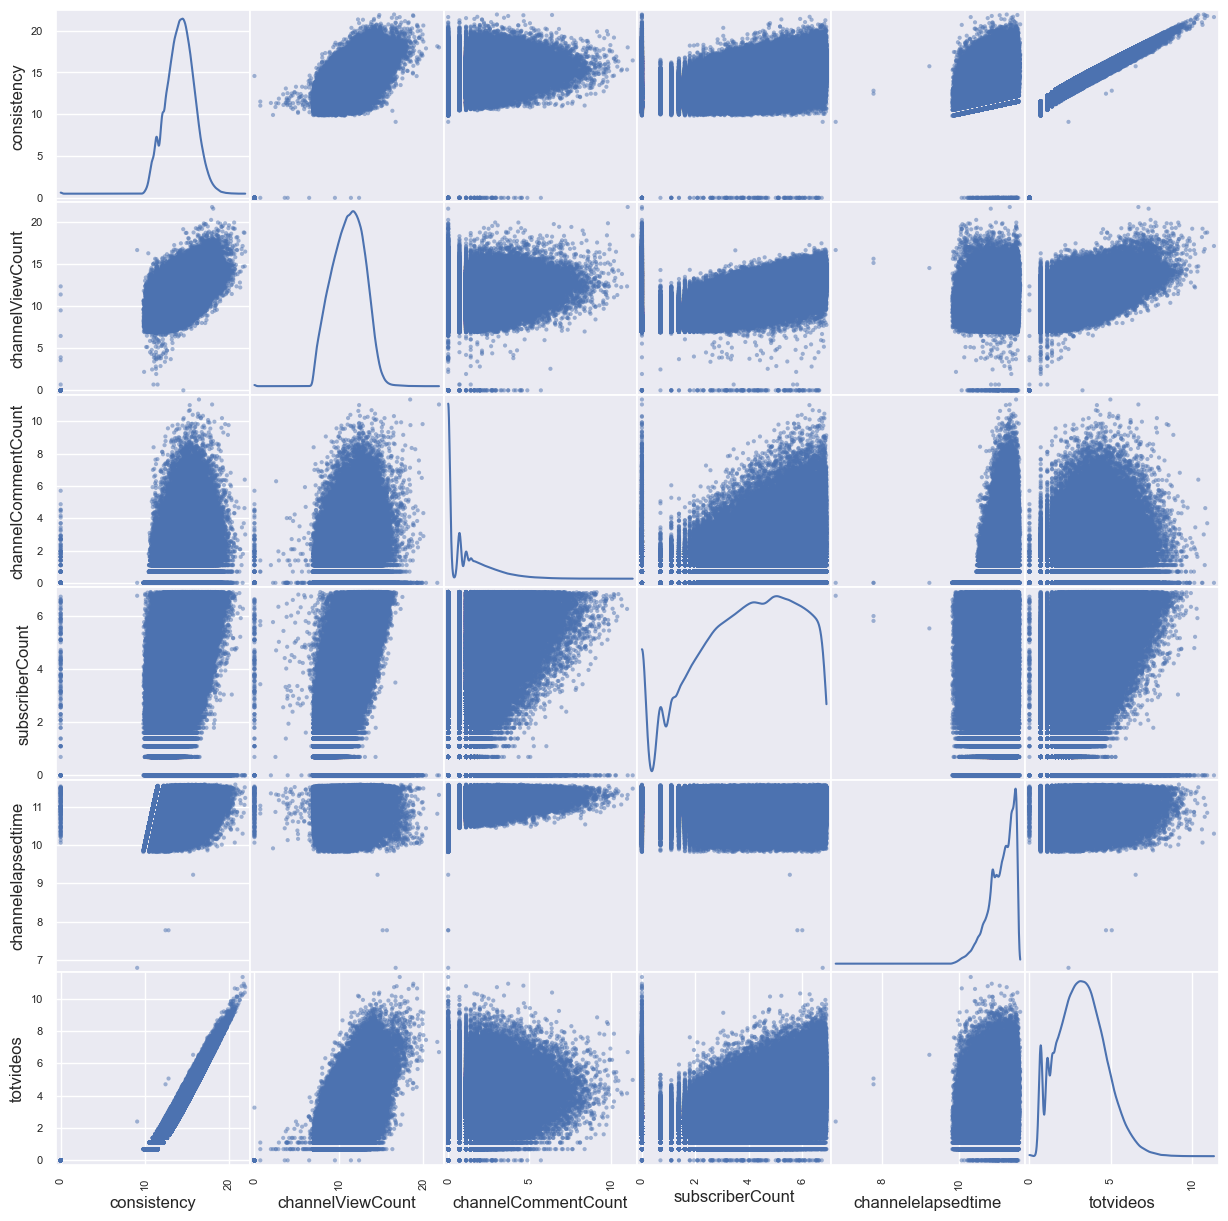

In [533]:
pd.plotting.scatter_matrix(X, figsize = (15, 15), diagonal = "kde")
plt.show()

As we can remember consistency was measure from (channel elapsed time being the duration of the channel x total videos) which does makes sense that the Channel View Count present a linear relationship. However, because it is probably measuring the same we will let it outside
    
    

##### Correlation Matrix 


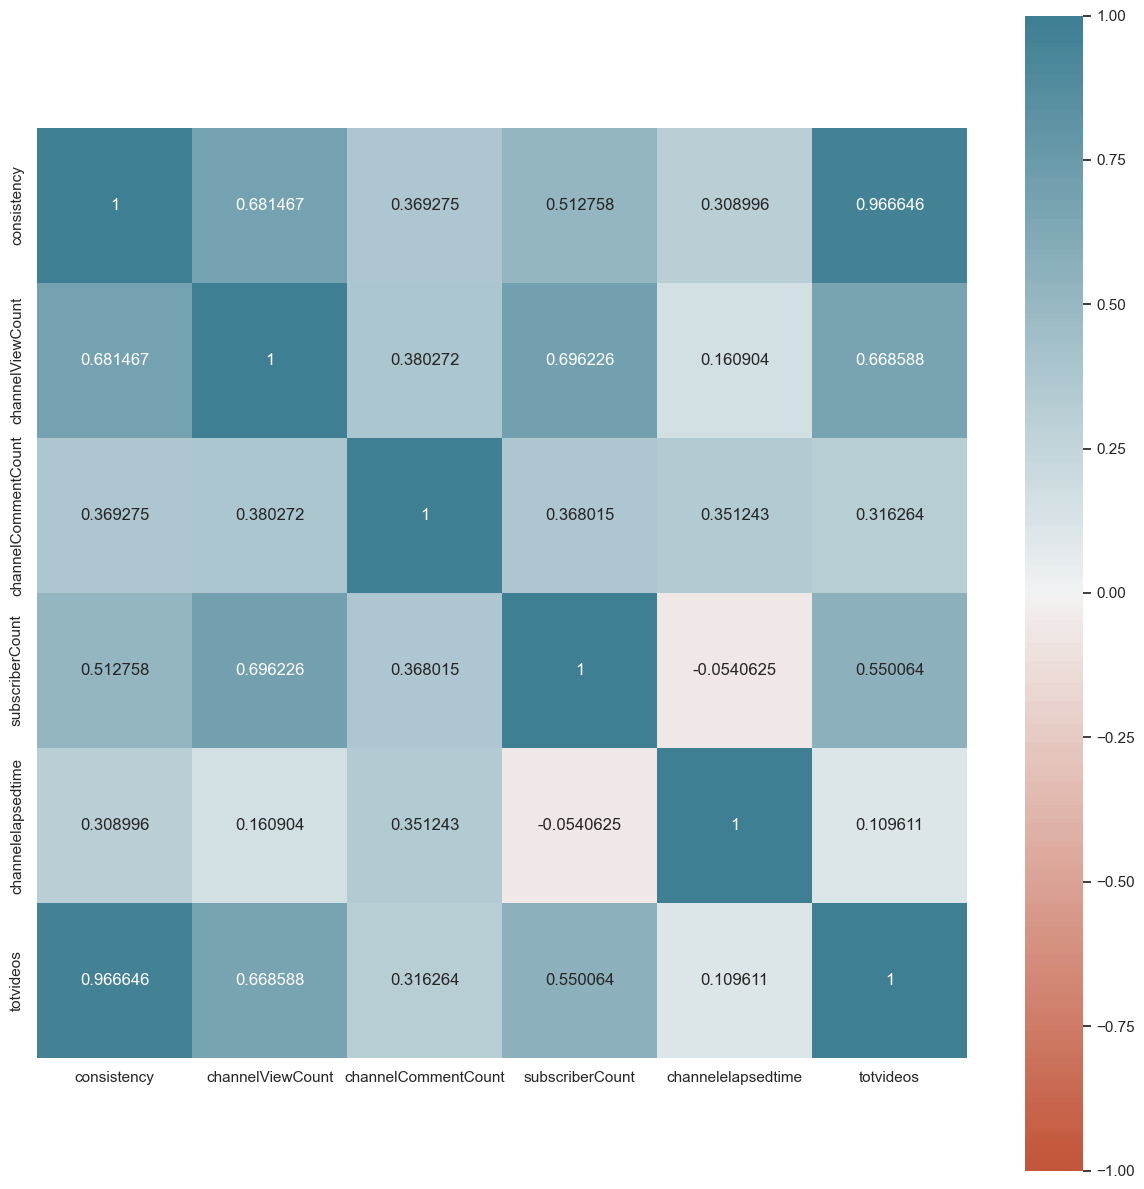

In [534]:
import seaborn as sns
Correlation_M = X.corr()
sns.set(rc={'figure.figsize':(15,15)})
ad = sns.heatmap(Correlation_M, vmin=-1, vmax=1,annot=True, fmt='g', center=0, cmap=sns.diverging_palette(20, 220, n=200),square=True)


In [535]:
X.head(3)
X=X.drop(["channelViewCount"],axis='columns') 
print(X.head(3))

   consistency  channelCommentCount  subscriberCount  channelelapsedtime  \
0    14.794269             0.693147         2.944439           11.393083   
1    15.376569             2.197225         5.220356           11.444754   
2    15.464415             1.791759         5.826000           11.187763   

   totvideos  
0   3.433987  
1   3.951244  
2   4.290459  


# Model


The following section will take a linear model Y(subscription)= consitency + channelCommentCount + subscriberCount  + channelelapsedtime. Then we will analyses it with Gradient Descendant. 

In [536]:
from sklearn.model_selection import train_test_split
X=X.dropna() 
X_train, X_val, y_train, y_val = train_test_split(X.loc[:,["consistency","channelCommentCount","channelelapsedtime","totvideos"]], X.loc[:,["subscriberCount"]], test_size=1/3, random_state=666)
print("X variables")
print(X.loc[:,["consistency","channelCommentCount","channelelapsedtime","totvideos"]])


X variables
        consistency  channelCommentCount  channelelapsedtime  totvideos
0         14.794269             0.693147           11.393083   3.433987
1         15.376569             2.197225           11.444754   3.951244
2         15.464415             1.791759           11.187763   4.290459
3         18.278837             0.000000           10.349743   7.929487
4         15.411947             0.693147           11.441666   3.988984
...             ...                  ...                 ...        ...
315058    12.961070             0.000000           10.658506   2.397895
315059    12.375617             7.336286           11.277013   1.386294
315060    14.167839             0.000000           11.459799   2.772589
315061    14.884818             0.693147           10.773965   4.127134
315062    16.739379             1.386294           11.186433   5.556828

[315063 rows x 4 columns]


In [537]:
## Standarization of values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

print(X_train.shape)
print(X_train)

(210042, 4)
[[-0.33758282 -0.76960576 -0.29028163 -0.35430792]
 [-0.01834808 -0.76960576 -0.67605884  0.08226351]
 [ 1.35106764  1.55240553 -0.41176288  1.5820885 ]
 ...
 [ 0.95584201  1.3544341  -1.41374829  1.36007389]
 [-2.15635373 -0.76960576 -1.39455981 -1.76365346]
 [-0.67779405  0.39139989  0.56209043 -0.88739496]]


#### Linear regression 

In [538]:

import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
# fitting the model
linear = LinearRegression()
linear = linear.fit( X_train, y_train )

# the coefficients of the model
print( 'weights[consistency  channelCommentCount  channelelapsedtime  totalofvideos]: {}'.format( linear.coef_ ) )
print( 'bias: {}'.format( linear.intercept_ ) )


y_pred_val = linear.predict( X_val )
print('R2:{}'.format(r2_score(y_val, y_pred_val)))
print('MAE:{}'.format(mean_absolute_error( y_val, y_pred_val)))


weights[consistency  channelCommentCount  channelelapsedtime  totalofvideos]: [[ 0.42092629  0.54071724 -0.47793688  0.49665698]]
bias: [3.88705742]
R2:0.38760709371970226
MAE:1.1112730002728797


For every increase in channel elapsed time/logevity, the weight at increasing total videos will have a increase weight of 0.42 towards the prediction of subscribers into channels with less than 1k subscribers.
An increase in the comments per channel has the biggest weight in the subscribers prediction. (It could be interesting to take Comments as proxy for engagement)


##### Comparing with Linear Regression with not Consistency

In [539]:

from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
# fitting the model
linear1 = LinearRegression()
linear1 = linear1.fit( X_train[:,1:], y_train )  ##taking out Consistency
# the coefficients of the model
print( 'weights [channelCommentCount  channelelapsedtime  totalofvideos]: {}'.format( linear1.coef_ ))
print( 'bias: {}'.format( linear1.intercept_ ))

y_pred_val1 = linear1.predict( X_val[:,1:])
print('R2:{}'.format(r2_score(y_val, y_pred_val1)))
print( 'MAE:{}'.format(mean_absolute_error( y_val, y_pred_val1 )))


weights [channelCommentCount  channelelapsedtime  totalofvideos]: [[ 0.53993085 -0.39117912  0.89446849]]
bias: [3.88705742]
R2:0.3868221298124346
MAE:1.1127436998107119


In simple terms, we could analyse R2

In [540]:
## Difference of prediction using consistency 
diff=r2_score(y_val, y_pred_val)-r2_score(y_val, y_pred_val1)
print("Explanation difference by R2 {}".format(diff))

diffm=mean_absolute_error( y_val, y_pred_val)-mean_absolute_error( y_val, y_pred_val1 )
print("Explanation difference by MAE {}".format(diffm))


Explanation difference by R2 0.0007849639072676773
Explanation difference by MAE -0.0014706995378321874


On those terms seems to be that Consistency increase the prediction of the model for the amount of subscribers towards the 1k. 
However, still it will be necessary to see with t-statistics whether that diff is significant. 

#### Still to do 

- Outliers!!!
- Multiple Imputation for NaN
- R2-adjusted
- maybe later compare with channels with subscribers >1k
- F-test to see if significance the difference between models 
- Pass to R
- Check the industry in which the Youtube channel is inclined to, maybe I can take its biggest percentage of videos in one category, for example Channel ADG has 80% of videos in Category Sports which will make me classified to that section. Then it can be compared between industries. Maybe compare whether in some industries the proxies of engagement dictate more the channel growth than consistency of deliverying videos. 
